## Baseline code

- target: count컬럼

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

In [3]:
print(train.info)
print(test.info)
print(train.shape, test.shape)

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

In [4]:
# print(train.info)
# print(test.info)
# print(train.shape, test.shape) # (10886, 12) (6493, 9)

X = train.drop(['casual', 'registered', 'count'], axis = 1)
y = train['count']

# print(X.shape, y.shape) # (10886, 9) (10886,)

X_full = pd.concat([X, test], axis = 0)
X_full = X_full.drop('datetime', axis=1)
# print(X_full.shape) # (17379, 8)
# print(X_full.head())

# X_full.isnull().sum() # casual registered

# 결측치 평균으로 처리
# X_full['casual'] = X_full['casual'].fillna(0)
# X_full['registered'] = X_full['registered'].fillna(0)

# X_full.isnull().sum()

# 범주형 데이터 처리
X_full = pd.get_dummies(X_full)
# print(X_full.shape) # (17379, 17389)
# print(X_full.head())

# 데이터 분리
X_train = X_full[:10886]
X_test = X_full[10886:]
# print(X_train.shape, X_test.shape)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)
# print(help(train_test_split))
# print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
# (8708, 17389) (2178, 17389) (8708,) (2178,)

# 모델 학습 및 검증
from sklearn.ensemble import RandomForestRegressor
# print(sklearn.ensemble.__all__)
model = RandomForestRegressor(
    n_estimators=50,    # default: 100 (줄이면 빨라짐)
    max_depth=10,        # depth 제한
    n_jobs=-1,           # 병렬 처리
    random_state=42
)
model.fit(X_train, y_train)
# print(help(RandomForestRegressor))
y_val_pred = model.predict(X_val)

from sklearn.metrics import mean_squared_log_error, r2_score
# print(sklearn.metrics.__all__)
rmsle = mean_squared_log_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(rmsle, r2)

# 결과 저장
y_pred = model.predict(X_test)
result = pd.DataFrame(y_pred, columns = ['count']).to_csv('result.csv', index=False)

# 결과 확인
result = pd.read_csv('result.csv')
print(result)

1.6486304531998472 0.368672533407872
           count
0     144.561247
1      67.334392
2      67.334392
3      89.743846
4      89.743846
...          ...
6488  108.020924
6489  108.020924
6490   83.341818
6491   84.513682
6492   74.113368

[6493 rows x 1 columns]


## EDA

In [5]:
# 데이터 크기
train.shape, test.shape

((10886, 12), (6493, 9))

In [6]:
# 데이터 샘플
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [7]:
# 데이터 샘플
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


- casual, registered의 합이 count인 것을 확인할 수 있음 (test에는 없으므로 제거)

In [8]:
# 결측값 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
# 결측값 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<AxesSubplot:>

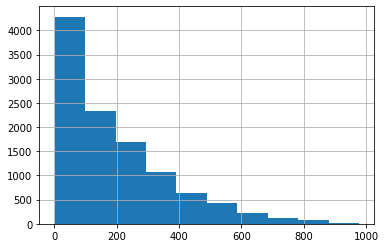

In [10]:
train['count'].hist()

## 전처리

In [11]:
# datetime

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)

In [12]:
# test에는 없는 컬럼 삭제
train = train.drop(['casual', 'registered'], axis=1)
train.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1


In [13]:
# target 별도 저장
target = train.pop('count')
target

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2023)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8708, 11), (2178, 11), (8708,), (2178,))

## 선형회귀 모델

In [15]:
# 평가
from sklearn.metrics import r2_score

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)
r2_score(y_val, pred)

0.30780476926281297

## 랜덤포레스트

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_val)
r2_score(y_val, pred)

0.44060781500743296

## XGBoost 모델

In [18]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
r2_score(y_val, pred)

0.40839958233431084

In [19]:
# 하이퍼파라미터 
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=9)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
r2_score(y_val, pred)

0.4473182182516243

## test 데이터 예측

In [20]:
# 예측
pred = xgb.predict(test)
pred

array([ 86.14312,  67.58316,  67.58316, ..., 146.57967, 109.61407,
       178.52168], dtype=float32)

In [21]:
# csv 파일 생성
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

submit = pd.DataFrame({
    'datetime': test['datetime'],
    'count': pred
})
submit.to_csv("submission.csv", index=False)

In [22]:
# 점검
print(pd.read_csv("submission.csv"))
print(submit.shape, test.shape)

                 datetime      count
0     2011-01-20 00:00:00   86.14312
1     2011-01-20 01:00:00   67.58316
2     2011-01-20 02:00:00   67.58316
3     2011-01-20 03:00:00   79.79623
4     2011-01-20 04:00:00   79.79623
...                   ...        ...
6488  2012-12-31 19:00:00  148.04665
6489  2012-12-31 20:00:00  148.04665
6490  2012-12-31 21:00:00  146.57967
6491  2012-12-31 22:00:00  109.61407
6492  2012-12-31 23:00:00  178.52168

[6493 rows x 2 columns]
(6493, 2) (6493, 9)
